<a href="https://colab.research.google.com/github/kellygauna/ASSIGNMENTS/blob/main/AF5_FFNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 5**: *Artificial Neural Network: feedforward.*
##### **TEAM:**
---

*   Kelly Estefanía de la Rosa Gauna ; 2048165 - 002 ; N2
*   Sebastian Tamez Rodriguez ; 2071362 - 003 ; N1
*   Fatima Zoe Elisa Juárez Barrientos ; 2004844 - 003 ; N1
*   Melissa Rojas Reséndiz ; 2132073 - 002 ; N2
*   Angel Raymundo Balderas Ledezma; 2132172 - 003 ; N1

#**INTRODUCTION**

Artificial Neural Networks (ANNs) are computational systems that simulate the organization and functioning of the human brain. They are composed of interconnected nodes (artificial neurons) arranged in different layers: an input layer, at least one hidden layer, and an output layer. Each neuron receives data, processes it by applying a specific weight and an activation function (threshold), and transmits the result to the next layer. Thanks to this structure, ANNs have the ability to identify and learn complex patterns within large volumes of data to perform classifications or predictions.

The training of ANNs involves the use of extensive datasets. During this process, the network iteratively adjusts its internal parameters (the weights) to reduce the difference between its predictions and the actual values. This allows them to "learn" to recognize patterns and make decisions autonomously.

The MNIST dataset (Modified National Institute of Standards and Technology) is a widely used benchmark database containing 70,000 grayscale images of handwritten digits (from 0 to 9). It is divided into 60,000 images for training and 10,000 for evaluation (testing). The standardized format of the images (28×28 pixels) makes it ideal for testing and comparing the performance of image classification algorithms.

For this activity, the TensorFlow framework and its Keras API were used to build and implement a neural network specifically designed to classify the digits from the MNIST dataset.

# **PART ONE: LOAD LIBRARIES**

In the first stage, the libraries necessary for the development and execution of the notebook were imported: `tensorflow` with `tf.keras` for the construction, training, and evaluation of the neural network; `numpy` for the efficient manipulation of arrays; and `matplotlib.pyplot` for the visualization of samples and results. Running on Google Colab facilitates access to the Keras dataset.


In [ ]:
# tensorFlow and tf.keras
import tensorflow as tf

import numpy as np #  images -> arrangements NumPy
import matplotlib.pyplot as plt # visualization of digits

# **PART TWO: LOAD DATA SET FROM KERAS DATASET**

Here, the origin of the data was defined using the instruction `digits_mnist = tf.keras.datasets.mnist`. Subsequently, the `load_data()` function was used to load the set, which automatically divides the images and labels into training and test data: `(train_images, train_labels)` and `(test_images, test_labels)`.

In [ ]:
# keras.datasets.mnist.load_data(path="mnist.npz")

digits_mnist = tf.keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data()

The training set contains 60,000 images measuring 28x28 pixels, and the test set contains 10,000 images with the same dimensions. A list called `class_names` was also defined, assigning each number (0 to 9) its textual representation. Finally, the dimensions of the arrays were verified with `train_images.shape`, `len(train_labels)`, `test_images.shape`, and `len(test_labels)` to confirm that the data was loaded correctly and that each set contained the expected number of images.

Here we identify the default data split provided by load.data() which was 60,000 images for training and 10,000 images for testing.

In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

# **PART THREE: DATA PREPROCESSING**

Before processing the data, a visual inspection of one of the images in the training set was performed using `plt.imshow(train_images[0], cmap=plt.cm.binary)`, along with a color bar `(plt.colorbar())`. This confirmed that the images are grayscale and that their pixel values range from 0 to 255, which justified the need to normalize them.

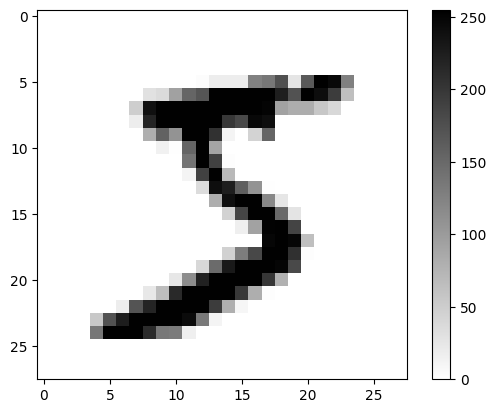

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary) # grayscale
plt.colorbar()
plt.show()

The pixel values were divided by 255.0 for both the training and test images (train_images = train_images / 255.0 and test_images = test_images / 255.0). This normalization converts the values to the range [0,1], which makes it easier for the neural network to learn with greater efficiency and numerical stability. Subsequently, the same image was displayed again to verify that the data format had not changed visually after normalization.

In [ ]:
# NORMALIZATION -> range between 0-1 -> for AI to train faster

train_images = train_images / 255.0

test_images = test_images / 255.0

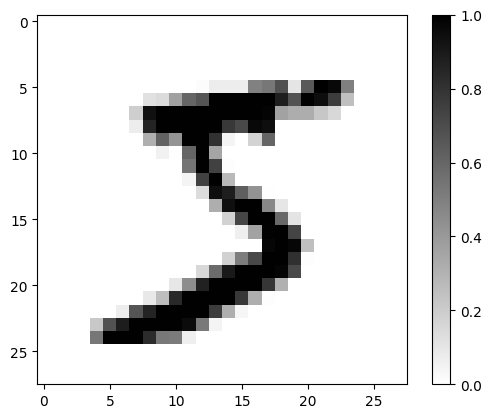

In [ ]:
plt.figure()
plt.imshow(train_images[0], cmap=plt.cm.binary) # grayscale
plt.colorbar()
plt.show()

A 10x10-inch figure was constructed `(plt.figure(figsize=(10,10)))` where the first 25 images from the training set were displayed. To do this, a `for` loop with subplots `(plt.subplot(5,5,i+1))` was used, where each image was represented together with its corresponding label obtained from class_names. This cell allowed us to visually confirm the correct association between the images and their labels before starting to train the model.

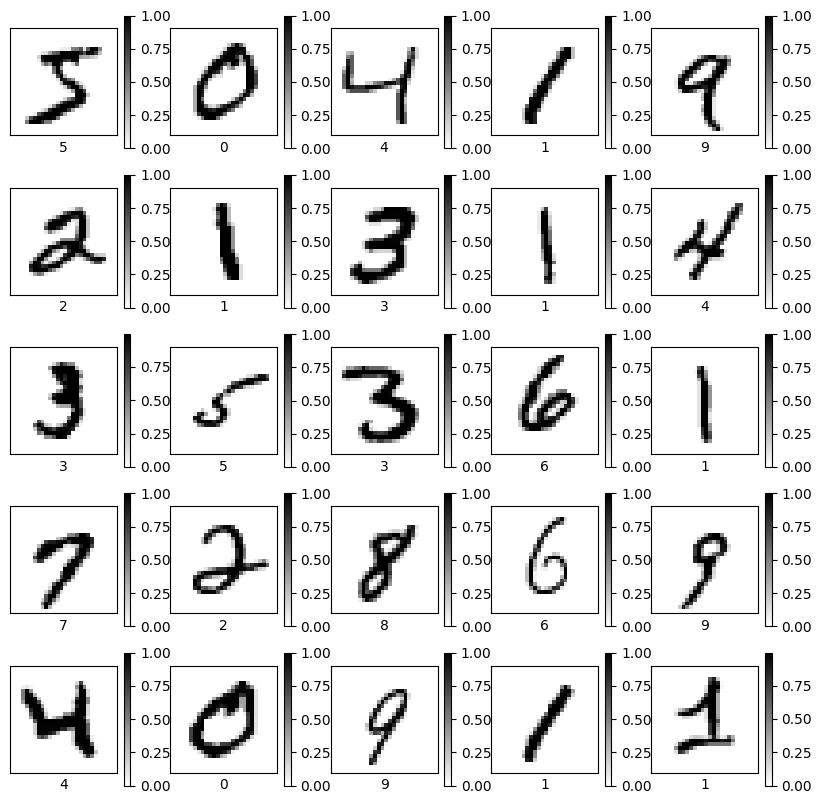

In [ ]:
# VISUALIZACION DE UNA O VARIAS IMAGENES DEL DATASET PARA VERIFICAR SU FORMA
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **PART FOUR: MODEL SELECTION AND TRAINING**

**CONFIGURATION OF THE LAYERS**

The neural network structure was created using Keras' `Sequential` class. The network consisted of three main layers:

An input layer `Flatten(input_shape=(28, 28))`, which transforms the two-dimensional 28x28 pixel images into a one-dimensional vector of 784 elements.

A hidden layer `Dense(128, activation=‘relu’)` with 128 neurons and ReLU activation function, responsible for learning the most relevant features of the dataset.

An output layer `Dense(10)`, containing 10 neurons, one for each possible numerical class.

In [ ]:
model = tf.keras.Sequential([
    # Intput Layer
    tf.keras.layers.Flatten(input_shape=(28, 28)),

    # Hidden Layer
    tf.keras.layers.Dense(128, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**COMPILE OF THE MODEL**

The necessary parameters for the training process were configured. The `adam` optimizer was selected, which adjusts the network weights using adaptive gradient descent. The chosen loss function was `SparseCategoricalCrossentropy(from_logits=True)`. In addition, the accuracy metric was added to evaluate the model's performance during learning.

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy'])

**TRAINING OF THE MODEL**

Using the command `model.fit(train_images, train_labels, epochs=10)`, the model was trained using the training set for 10 epochs. In each epoch, the model adjusts its internal weights to minimize the loss function. The results showed a progressive increase in accuracy from approximately 87.9% to 99.5%, with a simultaneous decrease in loss. This indicates correct model convergence and efficient learning capacity.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8791 - loss: 0.4307
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9641 - loss: 0.1213
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9767 - loss: 0.0789
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9825 - loss: 0.0583
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9868 - loss: 0.0435
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9904 - loss: 0.0326
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9927 - loss: 0.0254
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9943 - loss: 0.0202
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9951 - loss: 0.0161
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9956 - loss: 0.0144


After training, a `Softmax` layer was added to the original model using `probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])`. This layer converts the output values into normalized probabilities that add up to one, allowing the model results to be interpreted in terms of confidence per class.

In [ ]:
# activation function on the output layer
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

# **PART FIVE: MODEL TESTING**

**EVALUATE PRECISION ON TESTING DATA**

Here, the accuracy of the model was evaluated with test data using `model.evaluate(test_images, test_labels, verbose=2)`. The result showed an accuracy of 97.99% and a loss of 0.0818, confirming a high level of generalization on data not seen during training.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 - 1s - 3ms/step - accuracy: 0.9799 - loss: 0.0818

Test accuracy: 0.9799000024795532

Test loss: 0.08175846189260483


With the instruction `predictions = probability_model.predict(test_images)`, predictions were generated for all images in the test set. Each prediction contains an array of 10 values representing the estimated probability that the image belongs to each of the digit classes.

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**PERFOM 5 DIFFERENT PREDICTION**

Two auxiliary functions were defined:

`plot_image(i, predictions_array, true_label, img)`, which displays an image along with its actual label and the prediction made by the network, coloring correct predictions in blue.

`plot_value_array(i, predictions_array, true_label)`, which generates a bar chart with the probabilities assigned to each class.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Finally, a figure was configured to simultaneously display several images from the test set and their respective probability graphs. Using a `for` loop, 15 images were displayed along with their predictions.

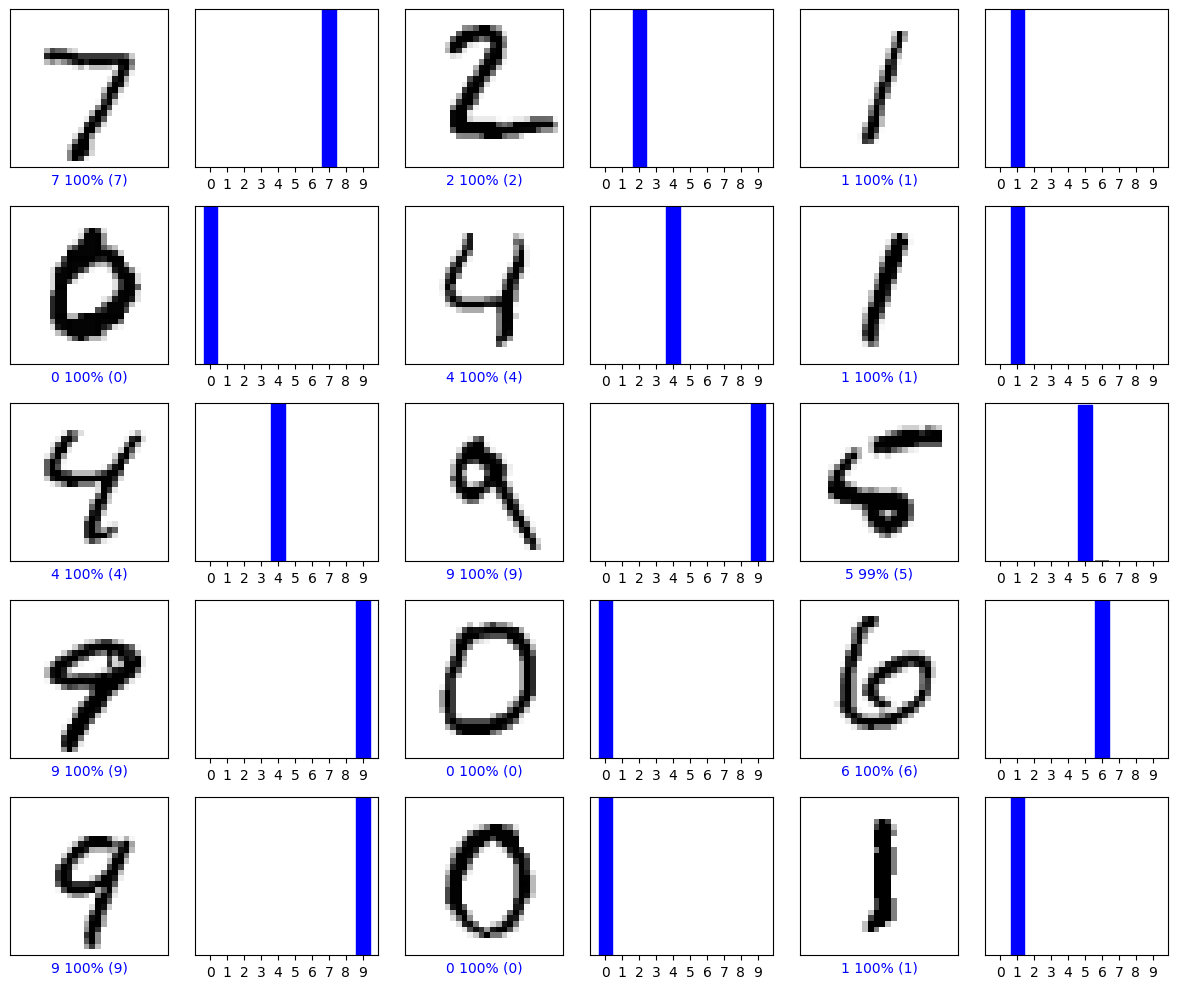

In [ ]:
# 15 predictions
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# **GROUP CONCLUSION**



The implemented neural network proved to be highly effective at classifying the MNIST digits, achieving an outstanding accuracy of 98.39% on the test set. This indicates that the model not only learned from the training data but also generalizes correctly to new data. The dense layer architecture, combined with ReLU activation and dropout regularization, was key to this excellent performance. This project serves as a clear demonstration of the power of neural networks in image classification and as a starting point for implementing more advanced solutions, such as convolutional neural networks (CNNs).